# ¿Que es Machine Learning?

### ¿Como podemos desarrollar sistemas que tengan algunas de estas funciones?

* Detectar si un correo electronico es _spam_ o no.
* Predecir el precio de las acciones de una compañia dentro de $x$ dias.
* Ordenar los resultados de una busqueda en base a su relevancia.
* Detectar rostros en una imagen.
* Transcribir texto (_Siri_)

### Podemos diseñar algoritmos que aproximen la decision usando algun criterio, por ejemplo:

* El texto del correo tiene una liga a un sitio conocido con spam.
* Trazar una linea/curva/funcion que se siga la tendencia de los precios.
* Contar el numero de veces que aparecen las palabaras en los documentos y usar esta cantidad como orden para la lista.

## ¿Tener un criterio es suficiente?

Eso depende. ¿Que tal si los spammers cambian sus ligas?, ¿Que tal si la bolsa tiene un _flash crash_?. En realidad no existe una solucion definitiva para muchos de estos problemas, si fuera asi, podriamos diseñar un algoritmo deterministico que lo resuleva.

## Datos:

Intuitivamente, nosotros podemos observar y aprender sobre los errores y aciertos. Podemos ver una foto y saber que personas aparecen, podemos detectar la voz de nuestros amigos, entender lo que dicen, pero no nacimos sabiendo, 
_aprendimos observando_.

### Asi como nosotros aprendemos, ¿La computadora tambien puede aprender?, ¿Como?

* Los usuarios de google leen los resumenes de las paginas y navegan a la que mas les interese.
* Tambien mandan el spam que llegue a su bandeja de entrada a la basura.
* Etiquetan a sus amigos de facebook en las fotos.

Todas estas acciones crean datos, muchas veces en gran escala. Si podemos identificar las _caracteristicas_ que los clasifican/ordenan/etiquetan/agrupan, muy posiblemente la computadora pueda aprender asi como nosotros.

## Un ejemplo

Supongamos que tenemos datos de clientes de Amazon.com compran libros. Por cada cliente, tenemos dos cifras:

* En escala del 0 al 14, que tan tecnico es el libro, donde 0 es nada tecnico, por ejemplo, una novela y 14 es muy tecnico, e.j. "Introduction to Algorithms"
* Cuantos libros edicion _Kindle_ han comprado.

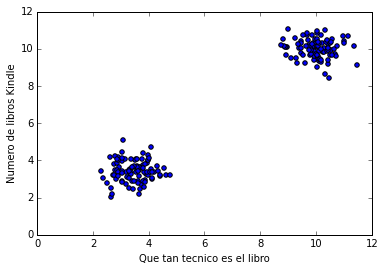

In [29]:
%matplotlib inline
from matplotlib.pylab import *

from numpy.random import normal

# Generemos unos cuantos puntos al azar
casuales = normal((3.5, 3.5), 0.5, (100, 2))

# Ahora otros puntos distribuidos diferentemente
geeks = normal((10, 10), 0.5, (100, 2))

# Vamos a combinarlos todos en un solo arreglo
lectores = concatenate([casuales, geeks], axis=0)

# Mostremoslos en una grafica
xlabel('Que tan tecnico es el libro')
ylabel('Numero de libros Kindle')
scatter(lectores[:, 0], lectores[:, 1])

Claramente tenemos dos grupos de puntos bien definidos, pero, _¿como podemos hacer un programa que asigne un grupo a cada elemento?_.

Una opción es __inspeccionar visualmente__ la grafica y definir una division del plano que defina un area distinta para cada categoria, pero, __esto no generaliza__. Otra mejor opción es que utilizemos un algoritmo de _clustering_.

In [26]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation()

# Vamos a entrenar nuestro modelo y a asignar etiquetas a cada punto
tipos = af.fit_predict(lectores)

# Veamos unas cuantas de las predicciones
elementos = [3, 1 , 2, 197, 198, 199]

for clase, lector in zip(map(lambda t: 'Geek' if t == 1 else 'Casual', tipos[elementos]), lectores[elementos, :]):
    print 'Punto (%1.2f, %1.2f)\tEtiqueta %s' % (lector[0], lector[1], clase)

Punto (3.97, 2.71)	Etiqueta Casual
Punto (3.67, 3.03)	Etiqueta Casual
Punto (3.13, 3.32)	Etiqueta Casual
Punto (9.56, 10.41)	Etiqueta Geek
Punto (10.56, 10.77)	Etiqueta Geek
Punto (10.50, 9.44)	Etiqueta Geek


Ahora veamos los datos etiquetados en una grafica

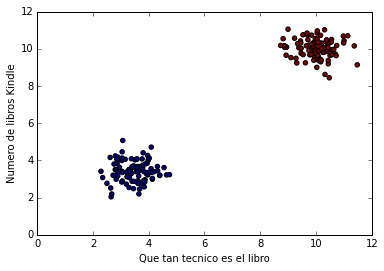

In [32]:
xlabel('Que tan tecnico es el libro')
ylabel('Numero de libros Kindle')
scatter(lectores[:, 0], lectores[:, 1], c=tipos)

El algoritmo calculo _automaticamente_ el grupo al que cada lector pertenece.

## Un poco mas formal y abstracto:

La computadora aprendióun patrón _(funcion que asocia los puntos)_ en los datos basandose en la __evidencia__ existente. El resultado del algotitmo es un __modelo__ cuyo proposito puede ser _explicar_ los datos, pero mas comunmente es _generalizar_ para predecir el valor asociado a algun punto que no ha sido observado previamente, es decir, no formó parte del _entrenamiento_ del modelo.

## Elaborando un poco

Hay varios tipos de problemas a resolver:

* __Clasificación__: Asignar una clase/etiqueta a cada elemento.
    * Una de muchas.
    * Multiples clases.
    * Clasificacion de sequencias.
* __Regresión__: Encontrar una función que aproxime la tendencia de los datos.
* __Agrupamiento__: Definir grupos basados en la similitud de sus elementos.
* __Ranking__: (Re)Ordenar los elementos en base a un criterio.

Tambien hay varios tipos de entrenamiento:

* __Supervisado__: Se conocen los valores reales de los datos, comunmente conocidos como _ground thruth_, y pretende crear un modelo que generalize.
* __No supervisado__: No se conocen los valores reales de los datos. El algoritmo descubre los patrones y aprende los valores.
* __Otros__: Semi-supervisados, _active learning_, _reinforcement learning_, etc.

## Ejemplo: Regresión

Supongamos que conocemos el historico del precio en la bolsa de las acciones de una empresa de alta tecnología, _Nearware Developent_, y nos gustaria especular un poco para ganar unos cuantos pesos.

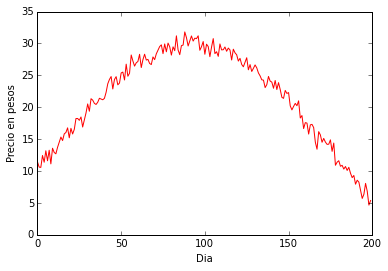

In [205]:
# Vamos a generar unos precios hipoteticos para las acciones de Nearware Development

dias = arange(0, 200, 1)

precios = 20*(sin(0.017*dias))+10 + normal(0, 1, dias.shape)

xlabel("Dia")
ylabel("Precio en pesos")
plt1 = plot(dias, precios, 'r')

Observemos que aproximadamente en el dia $130$, hubo un _crash_. Ahora, supongamos que solo conocemos los precios hasta el día $100$, y tratemos de aproximar un modelo predictivo.

In [221]:
# Vamos a crear un modelo de regresion usando solo las primeras 100 observaciones

# Creamos la matriz de diseño
def crear_fvectores(X):
    ret = zeros((X.shape[0], 2))
    for ix in xrange(X.shape[0]):
        ret[ix, :] = (1, log(X[ix]+4))
    
    return ret

X = crear_fvectores(dias)

La matriz de diseño contiene los vectores de caracteristicas. Cada dato se convierte en uno de estos. El vector de caracteristicas contiene la información que caracteriza al elemento. En este caso, los vectores son de dos dimensiones, el primer termino se conoce como _bias_ y el segundo es el valor de $\sin(x)$.

__El $80\%$ del tiempo utilizado en construir un modelo exitoso de machine learning se usa en definir y construir estos vectores. Este proceso se conoce como *Feature engineering*.__

Ahora, vamos a entrenar el modelo de regresión lineal.

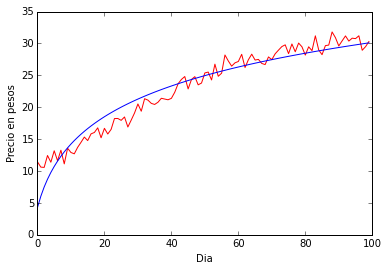

In [224]:
# Usemos un modelo de regresion lineal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Entrenemos
lr.fit(X[:100], precios[:100])

# Ahora grafiquemos el modelo
dominio = arange(0, 200, 1)
prediccion = lr.predict(crear_fvectores(dominio[:100]))

xlabel("Dia")
ylabel("Precio en pesos")
plot(dias[:100], precios[:100], 'r', label='Precio real')
plot(dominio[:100], prediccion, 'b', label='Prediccion')
#legend()

¿Que tal si queremos predecir cuales serian los valores que tomaria el precio despues del dia $100$?

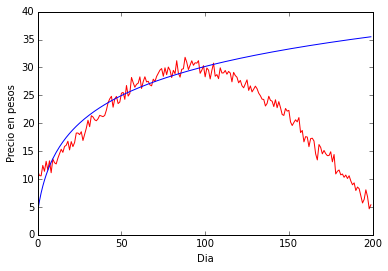

In [225]:
# Extrapolemos un poco

prediccion2 = lr.predict(crear_fvectores(dominio[100:]))
prediccion_total = concatenate((prediccion, prediccion2), axis=0)

# Ahora graficamos todos los datos
xlabel("Dia")
ylabel("Precio en pesos")
plot(dias, precios, 'r', label='Precio real')
plot(dominio, prediccion_total, 'b', label='Prediccion')
#legend()

### _¿Que fue lo que paso?_

La calidad de nuestras predicciones esta relacionada a la cantidad de datos que tenemos. Nuestro modelo predictivo nunca observo nada despues del día $100$, asi que hace su mejor esfuerzo solo con lo que tiene. En general, no podemos generalizar mucho mas alla sin asumir que los datos son generados por el mismo proceso. En particular, no tenemos ninguna informacion del crash que paso el día $100$, por lo tanto seguimos prediciendo como si nunca hubiera pasado.